In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression

In [2]:
yellow_jan = pd.read_parquet('../data/yellow_tripdata_2022-01.parquet')

print(yellow_jan.shape[1])

19


In [3]:
yellow_jan.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,1.0,N,142,236,1,14.5,3.0,0.5,3.65,0.0,0.3,21.95,2.5,0.0
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,1.0,N,236,42,1,8.0,0.5,0.5,4.00,0.0,0.3,13.30,0.0,0.0
2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,1.0,N,166,166,1,7.5,0.5,0.5,1.76,0.0,0.3,10.56,0.0,0.0
3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,1.0,N,114,68,2,8.0,0.5,0.5,0.00,0.0,0.3,11.80,2.5,0.0
4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.30,1.0,N,68,163,1,23.5,0.5,0.5,3.00,0.0,0.3,30.30,2.5,0.0


In [4]:
yellow_jan[['tpep_pickup_datetime', 'tpep_dropoff_datetime']] = yellow_jan[['tpep_pickup_datetime', 'tpep_dropoff_datetime']].apply(pd.to_datetime)
yellow_jan['duration'] = (yellow_jan['tpep_dropoff_datetime'] - yellow_jan['tpep_pickup_datetime']) / np.timedelta64(1, 'm')

In [5]:
yellow_jan['duration'].std()

46.44530513776802

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,duration
count,2.463931e+06,2463931,2463931,2.392428e+06,2.463931e+06,2.392428e+06,2.463931e+06,2.463931e+06,2.463931e+06,2.463931e+06,2.463931e+06,2.463931e+06,2.463931e+06,2.463931e+06,2.463931e+06,2.463931e+06,2.392428e+06,2.392428e+06,2.463931e+06
mean,1.707819e+00,2022-01-17 01:19:51.689726208,2022-01-17 01:34:04.421900544,1.389453e+00,5.372751e+00,1.415507e+00,1.660768e+02,1.635807e+02,1.194449e+00,1.294648e+01,1.006710e+00,4.914539e-01,2.385696e+00,3.749773e-01,2.967234e-01,1.916937e+01,2.282322e+00,8.249935e-02,1.421220e+01
min,1.000000e+00,2008-12-31 22:23:09,2008-12-31 23:06:56,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,-4.800000e+02,-4.500000e+00,-5.000000e-01,-1.252200e+02,-3.140000e+01,-3.000000e-01,-4.803000e+02,-2.500000e+00,-1.250000e+00,-3.442400e+03
10%,1.000000e+00,2022-01-04 17:30:25,2022-01-04 17:44:02,1.000000e+00,6.800000e-01,1.000000e+00,7.000000e+01,5.000000e+01,1.000000e+00,5.000000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,9.360000e+00,2.500000e+00,0.000000e+00,4.016667e+00
25%,1.000000e+00,2022-01-09 15:37:41,2022-01-09 15:50:50.500000,1.000000e+00,1.040000e+00,1.000000e+00,1.320000e+02,1.130000e+02,1.000000e+00,6.500000e+00,0.000000e+00,5.000000e-01,7.200000e-01,0.000000e+00,3.000000e-01,1.130000e+01,2.500000e+00,0.000000e+00,6.316667e+00
50%,2.000000e+00,2022-01-17 12:11:45,2022-01-17 12:23:49,1.000000e+00,1.740000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,9.000000e+00,5.000000e-01,5.000000e-01,2.000000e+00,0.000000e+00,3.000000e-01,1.469000e+01,2.500000e+00,0.000000e+00,1.018333e+01
75%,2.000000e+00,2022-01-24 13:49:37.500000,2022-01-24 14:02:51,1.000000e+00,3.130000e+00,1.000000e+00,2.340000e+02,2.360000e+02,1.000000e+00,1.400000e+01,2.500000e+00,5.000000e-01,3.000000e+00,0.000000e+00,3.000000e-01,2.002000e+01,2.500000e+00,0.000000e+00,1.616667e+01
90%,2.000000e+00,2022-01-28 14:27:18,2022-01-28 14:44:17,2.000000e+00,7.170000e+00,1.000000e+00,2.390000e+02,2.440000e+02,2.000000e+00,2.500000e+01,3.000000e+00,5.000000e-01,4.760000e+00,0.000000e+00,3.000000e-01,3.365000e+01,2.500000e+00,0.000000e+00,2.463333e+01
98%,2.000000e+00,2022-01-31 14:07:48,2022-01-31 14:23:32,5.000000e+00,1.828000e+01,2.000000e+00,2.630000e+02,2.630000e+02,2.000000e+00,5.200000e+01,3.500000e+00,5.000000e-01,1.130000e+01,6.550000e+00,3.000000e-01,7.185000e+01,2.500000e+00,1.250000e+00,4.215000e+01
99%,2.000000e+00,2022-01-31 18:11:00,2022-01-31 18:25:39.700000,6.000000e+00,1.970000e+01,4.000000e+00,2.640000e+02,2.640000e+02,2.000000e+00,5.250000e+01,3.750000e+00,5.000000e-01,1.262000e+01,6.550000e+00,3.000000e-01,7.572000e+01,2.500000e+00,1.250000e+00,5.085000e+01


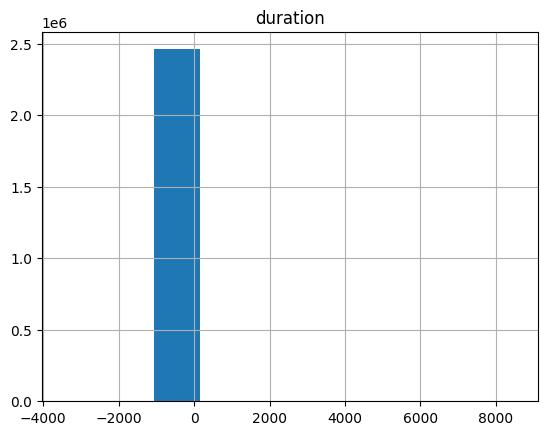

In [6]:
yellow_jan.hist('duration')

yellow_jan.describe(percentiles=[.1, .25, .5, .75, .9, .98, .99])

In [8]:
yellow_jan_filter = yellow_jan[yellow_jan['duration'].between(1, 60, inclusive='both')]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,duration
count,2.421440e+06,2421440,2421440,2.354481e+06,2.421440e+06,2.354481e+06,2.421440e+06,2.421440e+06,2.421440e+06,2.421440e+06,2.421440e+06,2.421440e+06,2.421440e+06,2.421440e+06,2.421440e+06,2.421440e+06,2.354481e+06,2.354481e+06,2.421440e+06
mean,1.700020e+00,2022-01-17 01:35:16.982017792,2022-01-17 01:47:57.258748160,1.389813e+00,5.374377e+00,1.359217e+00,1.660323e+02,1.636259e+02,1.189319e+00,1.266161e+01,1.014453e+00,4.940617e-01,2.371678e+00,3.636815e-01,2.974866e-01,1.888460e+01,2.301668e+00,8.057827e-02,1.267128e+01
min,1.000000e+00,2008-12-31 23:03:01,2008-12-31 23:06:56,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,-3.350000e+02,-4.500000e+00,-5.000000e-01,-1.252200e+02,-3.140000e+01,-3.000000e-01,-2.533000e+02,-2.500000e+00,-1.250000e+00,1.000000e+00
10%,1.000000e+00,2022-01-04 17:37:32,2022-01-04 17:50:21.800000,1.000000e+00,7.000000e-01,1.000000e+00,7.000000e+01,5.000000e+01,1.000000e+00,5.000000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,9.360000e+00,2.500000e+00,0.000000e+00,4.200000e+00
25%,1.000000e+00,2022-01-09 15:35:25,2022-01-09 15:47:44,1.000000e+00,1.060000e+00,1.000000e+00,1.320000e+02,1.130000e+02,1.000000e+00,6.500000e+00,0.000000e+00,5.000000e-01,1.000000e+00,0.000000e+00,3.000000e-01,1.130000e+01,2.500000e+00,0.000000e+00,6.433333e+00
50%,2.000000e+00,2022-01-17 11:58:39.500000,2022-01-17 12:09:32.500000,1.000000e+00,1.760000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,9.000000e+00,5.000000e-01,5.000000e-01,2.000000e+00,0.000000e+00,3.000000e-01,1.463000e+01,2.500000e+00,0.000000e+00,1.023333e+01
75%,2.000000e+00,2022-01-24 13:30:43.500000,2022-01-24 13:43:12.500000,1.000000e+00,3.120000e+00,1.000000e+00,2.340000e+02,2.360000e+02,1.000000e+00,1.350000e+01,2.500000e+00,5.000000e-01,3.000000e+00,0.000000e+00,3.000000e-01,1.980000e+01,2.500000e+00,0.000000e+00,1.613333e+01
90%,2.000000e+00,2022-01-28 14:20:54.100000,2022-01-28 14:35:59.100000,2.000000e+00,7.000000e+00,1.000000e+00,2.390000e+02,2.430000e+02,2.000000e+00,2.400000e+01,3.000000e+00,5.000000e-01,4.700000e+00,0.000000e+00,3.000000e-01,3.224000e+01,2.500000e+00,0.000000e+00,2.430000e+01
98%,2.000000e+00,2022-01-31 14:06:39.220000,2022-01-31 14:21:36.220000,5.000000e+00,1.813000e+01,2.000000e+00,2.630000e+02,2.630000e+02,2.000000e+00,5.200000e+01,3.500000e+00,5.000000e-01,1.100000e+01,6.550000e+00,3.000000e-01,6.919000e+01,2.500000e+00,1.250000e+00,3.971667e+01
99%,2.000000e+00,2022-01-31 18:11:47,2022-01-31 18:25:41.609999872,6.000000e+00,1.950000e+01,2.000000e+00,2.630000e+02,2.630000e+02,2.000000e+00,5.200000e+01,3.750000e+00,5.000000e-01,1.262000e+01,6.550000e+00,3.000000e-01,7.570000e+01,2.500000e+00,1.250000e+00,4.568333e+01


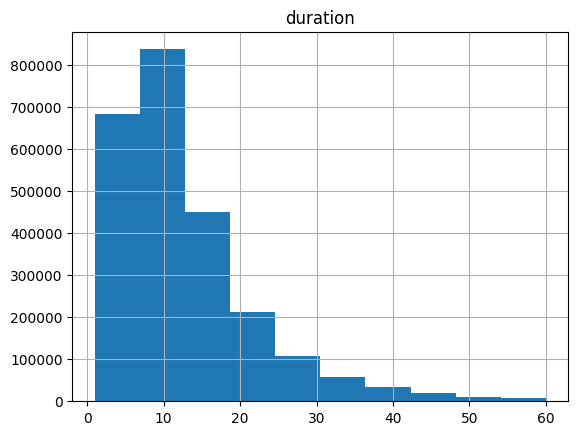

In [9]:
yellow_jan_filter.hist('duration')

yellow_jan_filter.describe(percentiles=[.1, .25, .5, .75, .9, .98, .99])

In [10]:
len(yellow_jan_filter) / float(len(yellow_jan))

0.9827547930522406

In [11]:
cat_col = ['PULocationID', 'DOLocationID']

yellow_jan_filter.loc[:, cat_col] = yellow_jan_filter[cat_col].astype('str')
yellow_jan_filter.dtypes

VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                     object
DOLocationID                     object
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
airport_fee                     float64
duration                        float64
dtype: object

In [12]:
np.mean(pd.isna(yellow_jan_filter['PULocationID']))

0.0

In [13]:
cat_dict = yellow_jan_filter[cat_col].to_dict(orient='records')

In [14]:
dict_vectorizer = DictVectorizer()
X_train = dict_vectorizer.fit_transform(cat_dict)
y_train = yellow_jan_filter['duration']

In [15]:
X_train.shape

(2421440, 515)

In [16]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [17]:
def RMSE(y_true, y_pred):
    out = np.sqrt(np.mean((y_true - y_pred) ** 2))
    return out

In [18]:
RMSE(y_train, lr.predict(X_train))

6.986190833327483

In [19]:
cat_col = ['PULocationID', 'DOLocationID']

def get_data(filepath):
    df = pd.read_parquet(filepath)
    
    df[['tpep_pickup_datetime', 'tpep_dropoff_datetime']] = df[['tpep_pickup_datetime', 'tpep_dropoff_datetime']].apply(pd.to_datetime)
    df['duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']) / np.timedelta64(1, 'm')
    
    df = df[df['duration'].between(1, 60, inclusive='both')]
    df.loc[:, cat_col] = df[cat_col].astype('str')
    
    return df

def get_features(df: pd.DataFrame):
    df_copy = df.copy()
    cat_dict = df_copy[cat_col].to_dict(orient='records')
    X = dict_vectorizer.transform(cat_dict)
    return X

In [21]:
data_val = get_data('../data/yellow_tripdata_2022-02.parquet')
X_val = get_features(data_val)
y_val = data_val['duration']

In [22]:
X_val.shape

(2918187, 515)

In [23]:
RMSE(y_val, lr.predict(X_val))

7.786408816421503